In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

## Train data

In [152]:
train=pd.read_csv(r'SalaryData_Train(1).csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [154]:
train.corr()

C:\Users\my computer\AppData\Local\Temp\ipykernel_13344\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [155]:
train.duplicated().sum()

3258

In [156]:
train=train.drop_duplicates()
train.duplicated().sum()

0

In [157]:
train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [158]:
train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [159]:
train['educationno'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [160]:
train['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [161]:
train['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [162]:
train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [163]:
train['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [164]:
train['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
       36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86], dtype=int64)

In [165]:
train['Salary'] = np.where(train['Salary'].str.contains(" >50K"), 1, 0)
train

C:\Users\my computer\AppData\Local\Temp\ipykernel_13344\3212961358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Salary'] = np.where(train['Salary'].str.contains(" >50K"), 1, 0)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [166]:
train=train.drop(['native','educationno','maritalstatus','relationship','race'],axis=1)
train

,age,workclass,education,occupation,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,Adm-clerical,Male,2174,0,40,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Male,0,0,13,0
2,38,Private,HS-grad,Handlers-cleaners,Male,0,0,40,0
3,53,Private,11th,Handlers-cleaners,Male,0,0,40,0
4,28,Private,Bachelors,Prof-specialty,Female,0,0,40,0
...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,Exec-managerial,Male,0,0,40,1
30155,22,Private,Some-college,Protective-serv,Male,0,0,40,0
30156,27,Private,Assoc-acdm,Tech-support,Female,0,0,38,0
30158,58,Private,HS-grad,Adm-clerical,Female,0,0,40,0


In [167]:
label=LabelEncoder()
train['workclass']=label.fit_transform(train['workclass'])
train['education']=label.fit_transform(train['education'])
train['occupation']=label.fit_transform(train['occupation'])
train['sex']=label.fit_transform(train['sex'])
train

,age,workclass,education,occupation,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,0,1,2174,0,40,0
1,50,4,9,3,1,0,0,13,0
2,38,2,11,5,1,0,0,40,0
3,53,2,1,5,1,0,0,40,0
4,28,2,9,9,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...
30154,53,2,12,3,1,0,0,40,1
30155,22,2,15,10,1,0,0,40,0
30156,27,2,7,12,0,0,0,38,0
30158,58,2,11,0,0,0,0,40,0


In [168]:
minmax=MinMaxScaler()
data=minmax.fit_transform(train)
data

array([[0.30136986, 0.83333333, 0.6       , ..., 0.        , 0.39795918,
        0.        ],
       [0.45205479, 0.66666667, 0.6       , ..., 0.        , 0.12244898,
        0.        ],
       [0.28767123, 0.33333333, 0.73333333, ..., 0.        , 0.39795918,
        0.        ],
       ...,
       [0.1369863 , 0.33333333, 0.46666667, ..., 0.        , 0.37755102,
        0.        ],
       [0.56164384, 0.33333333, 0.73333333, ..., 0.        , 0.39795918,
        0.        ],
       [0.47945205, 0.5       , 0.73333333, ..., 0.        , 0.39795918,
        1.        ]])

In [169]:
df=pd.DataFrame(data,columns=train.columns)
df

,age,workclass,education,occupation,sex,capitalgain,capitalloss,hoursperweek,Salary
0,0.301370,0.833333,0.600000,0.000000,1.0,0.021740,0.0,0.397959,0.0
1,0.452055,0.666667,0.600000,0.230769,1.0,0.000000,0.0,0.122449,0.0
2,0.287671,0.333333,0.733333,0.384615,1.0,0.000000,0.0,0.397959,0.0
3,0.493151,0.333333,0.066667,0.384615,1.0,0.000000,0.0,0.397959,0.0
4,0.150685,0.333333,0.600000,0.692308,0.0,0.000000,0.0,0.397959,0.0
...,...,...,...,...,...,...,...,...,...
26898,0.493151,0.333333,0.800000,0.230769,1.0,0.000000,0.0,0.397959,1.0
26899,0.068493,0.333333,1.000000,0.769231,1.0,0.000000,0.0,0.397959,0.0
26900,0.136986,0.333333,0.466667,0.923077,0.0,0.000000,0.0,0.377551,0.0
26901,0.561644,0.333333,0.733333,0.000000,0.0,0.000000,0.0,0.397959,0.0


<Axes: >

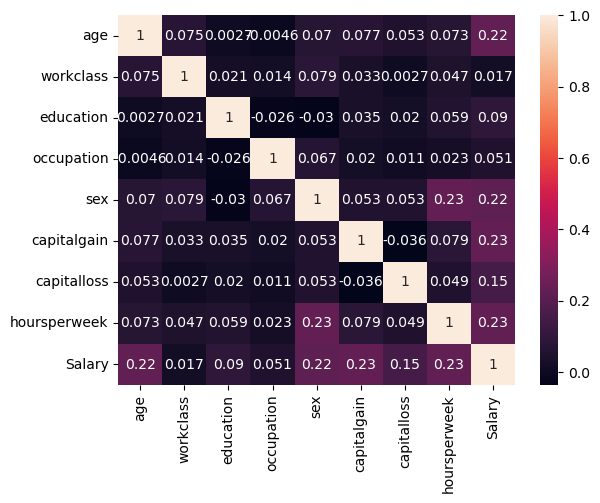

In [170]:
sns.heatmap(df.corr(),annot=True)

In [171]:
x_train=df.drop('Salary',axis=1)
x_train

,age,workclass,education,occupation,sex,capitalgain,capitalloss,hoursperweek
0,0.301370,0.833333,0.600000,0.000000,1.0,0.021740,0.0,0.397959
1,0.452055,0.666667,0.600000,0.230769,1.0,0.000000,0.0,0.122449
2,0.287671,0.333333,0.733333,0.384615,1.0,0.000000,0.0,0.397959
3,0.493151,0.333333,0.066667,0.384615,1.0,0.000000,0.0,0.397959
4,0.150685,0.333333,0.600000,0.692308,0.0,0.000000,0.0,0.397959
...,...,...,...,...,...,...,...,...
26898,0.493151,0.333333,0.800000,0.230769,1.0,0.000000,0.0,0.397959
26899,0.068493,0.333333,1.000000,0.769231,1.0,0.000000,0.0,0.397959
26900,0.136986,0.333333,0.466667,0.923077,0.0,0.000000,0.0,0.377551
26901,0.561644,0.333333,0.733333,0.000000,0.0,0.000000,0.0,0.397959


In [172]:
y_train=df[['Salary']]
y_train

,Salary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
26898,1.0
26899,0.0
26900,0.0
26901,0.0


## Test Data

In [173]:
test=pd.read_csv(r'SalaryData_Test(1).csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [174]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [175]:
test.duplicated().sum()

930

In [176]:
test=test.drop_duplicates()
test.duplicated().sum()

0

In [177]:
test['workclass'].unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [178]:
test['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [179]:
test['educationno'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1],
      dtype=int64)

In [180]:
test['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [181]:
test['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [182]:
test['relationship'].unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [183]:
test['race'].unique()

array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander'], dtype=object)

In [184]:
test['age'].unique()

array([25, 38, 28, 44, 34, 63, 24, 55, 65, 36, 26, 48, 43, 20, 37, 45, 22,
       23, 54, 32, 46, 56, 17, 29, 39, 52, 18, 21, 42, 33, 30, 47, 41, 19,
       69, 50, 31, 59, 49, 58, 40, 27, 57, 61, 51, 73, 53, 80, 62, 35, 72,
       64, 68, 66, 60, 67, 71, 70, 90, 77, 81, 74, 78, 82, 75, 85, 76, 89,
       83, 79, 88, 87, 84], dtype=int64)

In [185]:
test['Salary'] = np.where(test['Salary'].str.contains(" >50K"), 1, 0)
test

C:\Users\my computer\AppData\Local\Temp\ipykernel_13344\386128426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Salary'] = np.where(test['Salary'].str.contains(" >50K"), 1, 0)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [186]:
test=test.drop(['native','educationno','maritalstatus','relationship','race'],axis=1)
test

,age,workclass,education,occupation,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,Machine-op-inspct,Male,0,0,40,0
1,38,Private,HS-grad,Farming-fishing,Male,0,0,50,0
2,28,Local-gov,Assoc-acdm,Protective-serv,Male,0,0,40,1
3,44,Private,Some-college,Machine-op-inspct,Male,7688,0,40,1
4,34,Private,10th,Other-service,Male,0,0,30,0
...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,Prof-specialty,Male,0,0,40,0
15056,39,Private,Bachelors,Prof-specialty,Female,0,0,36,0
15057,38,Private,Bachelors,Prof-specialty,Male,0,0,50,0
15058,44,Private,Bachelors,Adm-clerical,Male,5455,0,40,0


In [187]:
label=LabelEncoder()
test['workclass']=label.fit_transform(test['workclass'])
test['education']=label.fit_transform(test['education'])
test['occupation']=label.fit_transform(test['occupation'])
test['sex']=label.fit_transform(test['sex'])
test

,age,workclass,education,occupation,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,6,1,0,0,40,0
1,38,2,11,4,1,0,0,50,0
2,28,1,7,10,1,0,0,40,1
3,44,2,15,6,1,7688,0,40,1
4,34,2,0,7,1,0,0,30,0
...,...,...,...,...,...,...,...,...,...
15055,33,2,9,9,1,0,0,40,0
15056,39,2,9,9,0,0,0,36,0
15057,38,2,9,9,1,0,0,50,0
15058,44,2,9,0,1,5455,0,40,0


In [188]:
minmax=MinMaxScaler()
data1=minmax.fit_transform(test)
data1

array([[0.10958904, 0.33333333, 0.06666667, ..., 0.        , 0.39795918,
        0.        ],
       [0.28767123, 0.33333333, 0.73333333, ..., 0.        , 0.5       ,
        0.        ],
       [0.15068493, 0.16666667, 0.46666667, ..., 0.        , 0.39795918,
        1.        ],
       ...,
       [0.28767123, 0.33333333, 0.6       , ..., 0.        , 0.5       ,
        0.        ],
       [0.36986301, 0.33333333, 0.6       , ..., 0.        , 0.39795918,
        0.        ],
       [0.24657534, 0.5       , 0.6       , ..., 0.        , 0.60204082,
        1.        ]])

In [189]:
df1=pd.DataFrame(data1,columns=test.columns)
df1

,age,workclass,education,occupation,sex,capitalgain,capitalloss,hoursperweek,Salary
0,0.109589,0.333333,0.066667,0.461538,1.0,0.000000,0.0,0.397959,0.0
1,0.287671,0.333333,0.733333,0.307692,1.0,0.000000,0.0,0.500000,0.0
2,0.150685,0.166667,0.466667,0.769231,1.0,0.000000,0.0,0.397959,1.0
3,0.369863,0.333333,1.000000,0.461538,1.0,0.076881,0.0,0.397959,1.0
4,0.232877,0.333333,0.000000,0.538462,1.0,0.000000,0.0,0.295918,0.0
...,...,...,...,...,...,...,...,...,...
14125,0.219178,0.333333,0.600000,0.692308,1.0,0.000000,0.0,0.397959,0.0
14126,0.301370,0.333333,0.600000,0.692308,0.0,0.000000,0.0,0.357143,0.0
14127,0.287671,0.333333,0.600000,0.692308,1.0,0.000000,0.0,0.500000,0.0
14128,0.369863,0.333333,0.600000,0.000000,1.0,0.054551,0.0,0.397959,0.0


<Axes: >

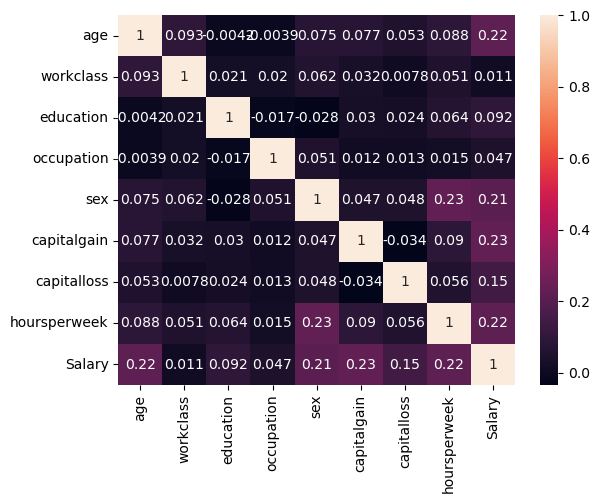

In [190]:
sns.heatmap(df1.corr(),annot=True)

In [191]:
x_test=df1.drop('Salary',axis=1)
x_test

,age,workclass,education,occupation,sex,capitalgain,capitalloss,hoursperweek
0,0.109589,0.333333,0.066667,0.461538,1.0,0.000000,0.0,0.397959
1,0.287671,0.333333,0.733333,0.307692,1.0,0.000000,0.0,0.500000
2,0.150685,0.166667,0.466667,0.769231,1.0,0.000000,0.0,0.397959
3,0.369863,0.333333,1.000000,0.461538,1.0,0.076881,0.0,0.397959
4,0.232877,0.333333,0.000000,0.538462,1.0,0.000000,0.0,0.295918
...,...,...,...,...,...,...,...,...
14125,0.219178,0.333333,0.600000,0.692308,1.0,0.000000,0.0,0.397959
14126,0.301370,0.333333,0.600000,0.692308,0.0,0.000000,0.0,0.357143
14127,0.287671,0.333333,0.600000,0.692308,1.0,0.000000,0.0,0.500000
14128,0.369863,0.333333,0.600000,0.000000,1.0,0.054551,0.0,0.397959


In [192]:
y_test=df[['Salary']]
y_test

,Salary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
26898,1.0
26899,0.0
26900,0.0
26901,0.0


# SVM

In [193]:
svm=SVC(C=4,kernel='rbf')
svm.fit(x_train,y_train)

C:\Users\my computer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=4)

In [194]:
y_pred=svm.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [195]:
svm.score(x_train,y_train)

0.8032189718618742